<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Define-circuit-and-parameters" data-toc-modified-id="Define-circuit-and-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define circuit and parameters</a></span></li><li><span><a href="#Spectrum" data-toc-modified-id="Spectrum-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spectrum</a></span></li><li><span><a href="#Matrix-elements" data-toc-modified-id="Matrix-elements-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matrix elements</a></span></li><li><span><a href="#Dispersive-shift" data-toc-modified-id="Dispersive-shift-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dispersive shift</a></span><ul class="toc-item"><li><span><a href="#Charge-coupling" data-toc-modified-id="Charge-coupling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Charge coupling</a></span></li><li><span><a href="#Flux-coupling" data-toc-modified-id="Flux-coupling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Flux coupling</a></span></li></ul></li></ul></div>

# Import

In [1]:
import scqubits as scq
print (scq.__version__)
import numpy as np
import matplotlib.pyplot as plt

#Plot settings
from matplotlib import rcParams
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 200
mpl.rc('lines',
       linewidth=1,
       dashed_pattern=[4, 3],
       dashdot_pattern=[4, 2, 1, 2],
       dotted_pattern=[1, 2])
rcParams['font.family'] = 'sans-serif'
rcParams['font.serif'] = ['Myriad Pro']
plt.style.use(['seaborn-deep'])
# mpl.rc('font'='myriad pro')

mpl.rc('mathtext',
       fontset='cm')

mpl.rc('axes',
       linewidth=0.5,
       titlesize=14,
       labelsize=14,
       titlepad=12,
       )

mpl.rc('xtick',
       top=True,
       labelsize=12,
       direction='in')

mpl.rc('xtick.major',
       size=3,
       width=0.75)

mpl.rc('xtick.minor',
       size=1,
       width=1,
       visible=False)

plt.rc('ytick',
       right=True,
       labelsize=12,
       direction='in')

mpl.rc('ytick.major',
       size=3,
       width=0.75)

mpl.rc('ytick.minor',
       size=1,
       width=0.5,
       visible=False)

mpl.rc('legend',
       fontsize=12)

mpl.rc('figure',
       titlesize=12)

mpl.rcParams['axes.linewidth'] = 0.75
hfont = {'fontname':'Myriad Pro'}
%matplotlib inline

3.3.0


 C:\Users\QEDLiu\AppData\Local\Temp\ipykernel_10404\3103952792.py: 18

# Define circuit and parameters

In [2]:
#Here, we define the circuit topology and the relevant parameters
circuit_yaml = """
branches:
- ["JJ", 1,2, EJ = 4,  4]
- ["L", 1,2, EL=1]
"""
fluxonium = scq.Circuit(circuit_yaml, from_file=False, ext_basis="harmonic")

In [3]:
#Find the symbol for external flux here, if there is any
fluxonium.external_fluxes

[Φ1]

In [4]:
#Verify the symbolic Hamiltonian and the relevant operators
fluxonium.sym_hamiltonian()

<IPython.core.display.Latex object>

In [5]:
fluxonium.operator_names_in_hamiltonian_symbolic()

['θ1', 'Q1']

In [6]:
fluxonium.cutoffs_dict()

{1: 30}

# Spectrum

In [7]:
# Compute spectrum here
flux_range = np.linspace(0, 1, 201)
spectrum = fluxonium.get_spectrum_vs_paramvals("Φ1", flux_range, subtract_ground=False,evals_count=12)

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

(0.0, 15.0)

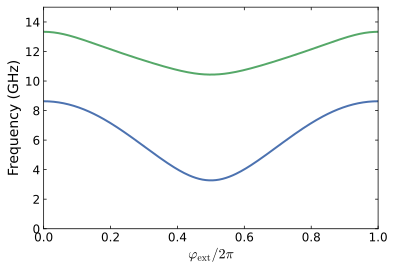

In [8]:
# Make a simple spectrum plot here, with respect to the ground state energy
fig,axes=plt.subplots(figsize = [6,4])
for idx in range(1,5):
    axes.plot(flux_range, spectrum.energy_table[:,idx]-spectrum.energy_table[:,0],linewidth = 2)
axes.set_xlabel(r'$\varphi_\mathrm{ext}/2\pi$')  
axes.set_ylabel('Frequency (GHz)')
axes.set_xlim([0,1])
axes.set_ylim([0,15])

# Matrix elements

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Φ1', ylabel='matrix element'>)

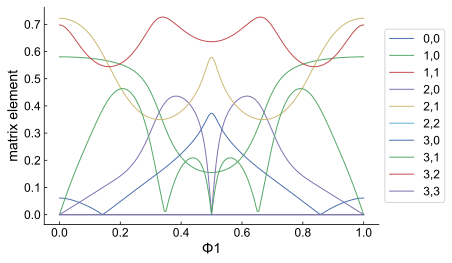

In [15]:
fluxonium.plot_matelem_vs_paramvals(operator='Q1_operator',param_name="Φ1", param_vals=flux_range)

In [71]:
#Compute here. This actually compute both matrix elements and spectrum
charge_melement = fluxonium.get_matelements_vs_paramvals(operator='Q1_operator',param_name="Φ1", param_vals=flux_range, evals_count=10)
phase_melement = fluxonium.get_matelements_vs_paramvals(operator='θ1_operator',param_name="Φ1", param_vals=flux_range, evals_count=10)

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

In [72]:
# charge_melement.matrixelem_table.shape
# charge_melement.energy_table.shape

In [73]:
# abs(charge_melement.matrixelem_table[0,:,:])

Text(0, 0.5, '$|\\varphi_{ij}|$')

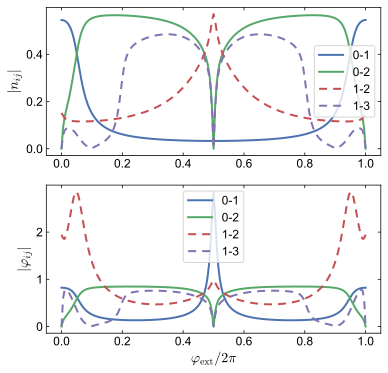

In [74]:
#Plotting
fig,[ax1,ax2] = plt.subplots(2,1,figsize = [6,6])

ax1.plot(flux_range,abs(charge_melement.matrixelem_table[:,0,1]), linewidth=2, label = '0-1')
ax1.plot(flux_range,abs(charge_melement.matrixelem_table[:,0,2]), linewidth=2, label = '0-2')
ax1.plot(flux_range,abs(charge_melement.matrixelem_table[:,1,2]), linewidth=2, label = '1-2', linestyle = '--')
ax1.plot(flux_range,abs(charge_melement.matrixelem_table[:,1,3]), linewidth=2, label = '1-3', linestyle = '--')

ax2.plot(flux_range,abs(phase_melement.matrixelem_table[:,0,1]), linewidth=2, label = '0-1')
ax2.plot(flux_range,abs(phase_melement.matrixelem_table[:,0,2]), linewidth=2, label = '0-2')
ax2.plot(flux_range,abs(phase_melement.matrixelem_table[:,1,2]), linewidth=2, label = '1-2', linestyle = '--')
ax2.plot(flux_range,abs(phase_melement.matrixelem_table[:,1,3]), linewidth=2, label = '1-3', linestyle = '--')

ax1.legend()
ax1.set_ylabel(r'$|n_{ij}|$')
ax2.legend()
ax2.set_xlabel(r'$\varphi_\mathrm{ext}/2\pi$')
ax2.set_ylabel(r'$|\varphi_{ij}|$')

# Dispersive shift

## Charge coupling

In [75]:
#Have to compute the matrix elements above first.

wr = 7 #GHz
g = 0.1
chi_0 = 0
chi_1 = 0
for idx in range(10):
    chi_0 = chi_0 + abs(charge_melement.matrixelem_table[:,0,idx])**2 * (charge_melement.energy_table[:,idx]-charge_melement.energy_table[:,0]) / ((charge_melement.energy_table[:,idx]-charge_melement.energy_table[:,0])**2-wr**2)
    chi_1 = chi_1 + abs(charge_melement.matrixelem_table[:,1,idx])**2 * (charge_melement.energy_table[:,idx]-charge_melement.energy_table[:,1]) / ((charge_melement.energy_table[:,idx]-charge_melement.energy_table[:,1])**2-wr**2)
chi_01 = (chi_0-chi_1)*2*g**2

Text(0, 0.5, '$\\chi/2\\pi$ (MHz)')

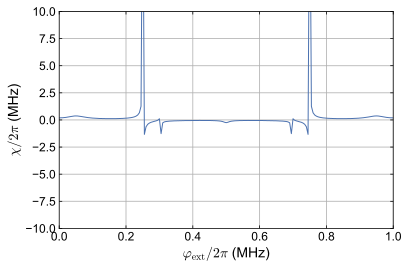

In [76]:
plt.plot(flux_range, chi_01*1e3)
plt.xlim([0,1])
plt.ylim([-10,10])
plt.grid()
plt.xlabel(r'$\varphi_\mathrm{ext}/2\pi$ (MHz)')
plt.ylabel(r'$\chi/2\pi$ (MHz)')

## Flux coupling

In [77]:
#Have to compute the matrix elements above first.

wr = 7 #GHz
g = 0.1
chi_0 = 0
chi_1 = 0
for idx in range(10):
    chi_0 = chi_0 + abs(phase_melement.matrixelem_table[:,0,idx])**2 * (phase_melement.energy_table[:,idx]-phase_melement.energy_table[:,0]) / ((phase_melement.energy_table[:,idx]-phase_melement.energy_table[:,0])**2-wr**2)
    chi_1 = chi_1 + abs(phase_melement.matrixelem_table[:,1,idx])**2 * (phase_melement.energy_table[:,idx]-phase_melement.energy_table[:,1]) / ((phase_melement.energy_table[:,idx]-phase_melement.energy_table[:,1])**2-wr**2)
chi_01 = (chi_0-chi_1)*2*g**2

Text(0, 0.5, '$\\chi/2\\pi$ (MHz)')

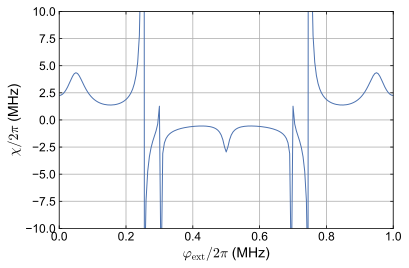

In [78]:
plt.plot(flux_range, chi_01*1e3)
plt.xlim([0,1])
plt.ylim([-10,10])
plt.grid()
plt.xlabel(r'$\varphi_\mathrm{ext}/2\pi$ (MHz)')
plt.ylabel(r'$\chi/2\pi$ (MHz)')